# Severity Modelling

This covers the second part of the modelling. The target variable is the loss.

## 001: Create the dataset and split dataset

In [1]:
from src.model.dataset import Dataset

insurance_initiation_variables_path = "../data/input/exp/Insurance_Initiation_Variables.csv"
claims_variables_path = "../data/input/exp/sample_type_claim.csv"

claim_grouping_columns = ['ID', 'Cost_claims_year']
claim_aggregation_column = 'Cost_claims_by_type'
merging_columns = ['ID', 'Cost_claims_year']

dataset = (Dataset(data_path=insurance_initiation_variables_path,
                   claims_path=claims_variables_path)
           .group_claims(grouping_columns=claim_grouping_columns, aggregation_column=claim_aggregation_column)
           .create_dataset(merge_columns=merging_columns)
           )
trainset, testset = dataset.split_dataset(test_ratio=0.2, to_shuffle=False)

## 002: Engineer relevant features

In [2]:
from model.feature import main as feature_main

features_trainset = feature_main(trainset)
features_testset = feature_main(testset)

## 003: Severity modelling

The response variable is the number of claims dubbed `Cost_claims_year` in the dataset. The first step would be to understand the distribution of the response variable

Average loss distribution: 149.84895492871016


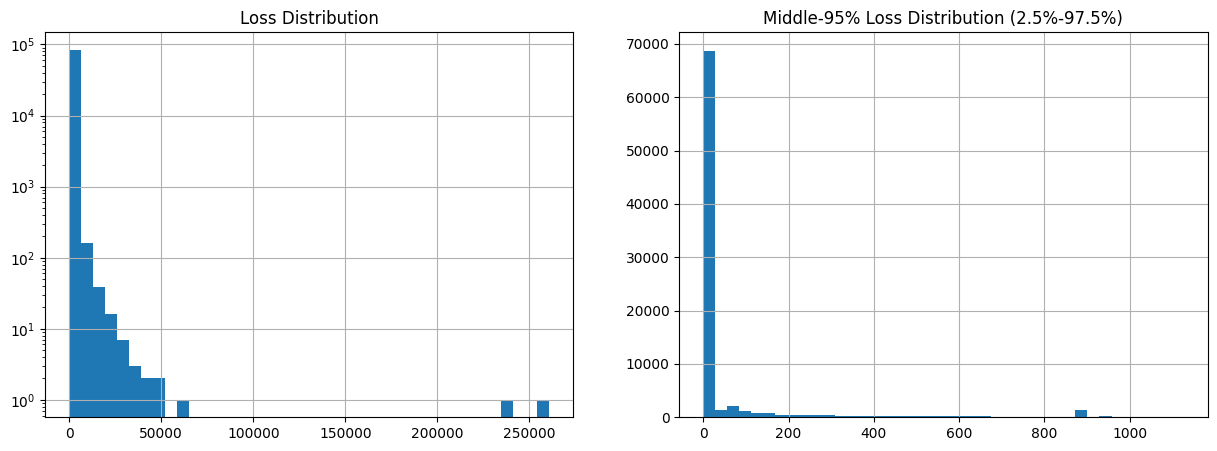

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15, 5))
ax0.set_title('Loss Distribution')
_ = features_trainset['Cost_claims_year'].hist(bins=40, log=True, ax=ax0)


p2_5, p97_5 = np.percentile(features_trainset['Cost_claims_year'], [2.5, 97.5])
middle_95 = features_trainset['Cost_claims_year'][(features_trainset['Cost_claims_year'] >= p2_5) &
                                                   (features_trainset['Cost_claims_year'] <= p97_5)]
ax1.set_title('Middle-95% Loss Distribution (2.5%-97.5%)')
_ = middle_95.hist(bins=40, log=False, ax=ax1)

print(
    "Average loss distribution: {}".format(
        np.average(features_trainset['Cost_claims_year'])
    )
)

#TODO: Understand the severity model development

- Understand the distribution of the loss
- Use the insurance initial contact variables to model the severity